In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
data=pd.read_csv('Climate_Dataset.csv')

In [3]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.shape

(145460, 23)

In [5]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
#For showing how many unique values each columns have
data.nunique(dropna=False)

Date             3436
Location           49
MinTemp           390
MaxTemp           506
Rainfall          682
Evaporation       359
Sunshine          146
WindGustDir        17
WindGustSpeed      68
WindDir9am         17
WindDir3pm         17
WindSpeed9am       44
WindSpeed3pm       45
Humidity9am       102
Humidity3pm       102
Pressure9am       547
Pressure3pm       550
Cloud9am           11
Cloud3pm           11
Temp9am           442
Temp3pm           503
RainToday           3
RainTomorrow        3
dtype: int64

In [8]:
#The date is too long from 2008 to 2017
#So, we will try to take just three year data
#For that purpose converting pandas core series type of column 'Date'  to datetime format
type(data['Date'])
data['Date']= pd.to_datetime(data['Date'])

In [9]:
#Now spliting date attribute into year according to our sceniro
data["year"] = data['Date'].map(lambda x: x.year)

In [10]:
#Now selecting data of last three years from 2015 t0 2017
data=data.apply(lambda x:x[data['year']>2014]).reset_index()

In [11]:
data['index'] = data['year'].values
data.rename(columns=
{
"index": "Year",
}, inplace=True)
data.drop('year', inplace=True, axis=1)

In [12]:
#Applying interpolation for filling missing values
data['MinTemp']= data['MinTemp'].interpolate(method='nearest')
data['MaxTemp']= data['MaxTemp'].interpolate(method='nearest')


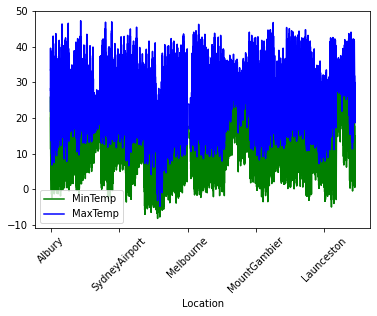

In [13]:
#Minimum and Maximum Temperature Comparision based on same location
ax = data[["Location","MinTemp", "MaxTemp"]].plot(x='Location',kind='line',color=["g","b"],rot=45)
ax.legend(["MinTemp", "MaxTemp"])


<AxesSubplot:xlabel='Location'>

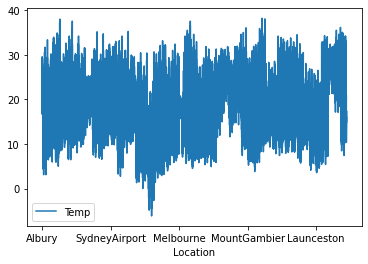

In [14]:
#Taking mean temeperature from both different columns and stored into new one
data['Temp'] = data[['MinTemp', 'MaxTemp']].mean(axis=1)
data.plot(x='Location', y='Temp')

In [15]:
#The most min temp
print("Minimum Temperature   "+str(data['MinTemp'].min()))
data.groupby('Location',sort = False)['MinTemp'].min().nsmallest()

Minimum Temperature   -8.2


Location
MountGinini    -8.2
Canberra       -7.0
Tuggeranong    -6.5
Ballarat       -5.6
AliceSprings   -5.0
Name: MinTemp, dtype: float64

In [16]:
#Most max temp
print("Maximum Temperature   "+str(data['MaxTemp'].max()))
data.groupby('Location',sort = False)['MaxTemp'].max().nlargest()

Maximum Temperature   47.3


Location
Moree       47.3
Richmond    47.0
Penrith     46.9
Woomera     46.8
Cobar       46.6
Name: MaxTemp, dtype: float64

In [17]:
#Largest amount of rainfall
print("Highest Rainfall      "+str(data['Rainfall'].max()))
data.groupby('Location',sort = False)['Rainfall'].max().nlargest()

Highest Rainfall      247.2


Location
Cairns          247.2
Newcastle       240.0
Williamtown     225.0
CoffsHarbour    219.6
Darwin          210.6
Name: Rainfall, dtype: float64

In [18]:
#Checking missing values
data.isnull().mean()

Year             0.000000
Date             0.000000
Location         0.000000
MinTemp          0.000000
MaxTemp          0.000023
Rainfall         0.027677
Evaporation      0.546870
Sunshine         0.626142
WindGustDir      0.059876
WindGustSpeed    0.059403
WindDir9am       0.063476
WindDir3pm       0.041875
WindSpeed9am     0.007043
WindSpeed3pm     0.036002
Humidity9am      0.023941
Humidity3pm      0.067571
Pressure9am      0.118469
Pressure3pm      0.118402
Cloud9am         0.422641
Cloud3pm         0.477656
Temp9am          0.014896
Temp3pm          0.059201
RainToday        0.027677
RainTomorrow     0.027834
Temp             0.000000
dtype: float64

In [19]:
# Missing values % in the features Evaporation=43%, Sunshine 48%, Cloud9am=38%, Cloud3pm=40% 
# These are too much missing values, So, I'm dropping this columns.

data=data.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis = 1)

In [20]:
# Now seperate Categories and numerical features

df_cat=data[['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Date','Location']]

df_num=data.drop(['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow','Date','Location'], axis = 1)

In [21]:
# Every location has different windspeed, direction, Temperature and Pressure  
# Replacing Categories features with most frequent value based on location 

for col in df_cat.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    df_cat[col] = data.groupby(['Location'])[col].apply(lambda x: x.fillna(x.mode().max()))

In [22]:
# Still we have missing value for WindGustDir because for few locations we have no values 

df_cat.isnull().mean()

WindGustDir     0.040795
WindDir9am      0.000000
WindDir3pm      0.000000
RainToday       0.000000
RainTomorrow    0.000000
Date            0.000000
Location        0.000000
dtype: float64

In [23]:
# We replace this values with the mode of complete dataset

df_cat['WindGustDir']=data['WindGustDir'].fillna(data['WindGustDir'].mode().max())

In [24]:
# Replacing Numerical features with mean value based on location same as Categories

for col in df_num.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    df_num[col] = data.groupby(['Location'])[col].apply(lambda x: x.fillna(x.mean()))

In [25]:
# This has same problem as df_cat, We will replace is mean value of dataset

df_num['WindGustSpeed']=df_num['WindGustSpeed'].fillna(data['WindGustSpeed'].mean())
df_num['Pressure9am']=df_num['Pressure9am'].fillna(data['Pressure9am'].mean())
df_num['Pressure3pm']=df_num['Pressure3pm'].fillna(data['Pressure3pm'].mean())

In [26]:
d={'Yes':1,'No':0}
df_cat['RainTomorrow']=df_cat['RainTomorrow'].map(d)
df_cat['RainToday']=df_cat['RainToday'].map(d)

In [27]:
df_cat2=df_cat[['WindGustDir','WindDir9am','WindDir3pm','Location']]

#Replacing Categories value with value counts

df_cat2['Location']=df_cat2['Location'].map(df_cat2['Location'].value_counts())
df_cat2['WindGustDir']=df_cat2['WindGustDir'].map(df_cat2['WindGustDir'].value_counts())
df_cat2['WindDir9am']=df_cat2['WindDir9am'].map(df_cat2['WindDir9am'].value_counts())
df_cat2['WindDir3pm']=df_cat2['WindDir3pm'].map(df_cat2['WindDir3pm'].value_counts())

In [28]:
df_n=pd.merge(df_num, df_cat2, left_index=True, right_index=True)

In [29]:
# Using Standar Scaler to scaled

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_n)
df_scaled = pd.DataFrame(scaler.fit_transform(df_n),columns = df_n.columns)

In [30]:
df_x=pd.merge(df_scaled, df_cat['RainToday'],left_index=True, right_index=True)

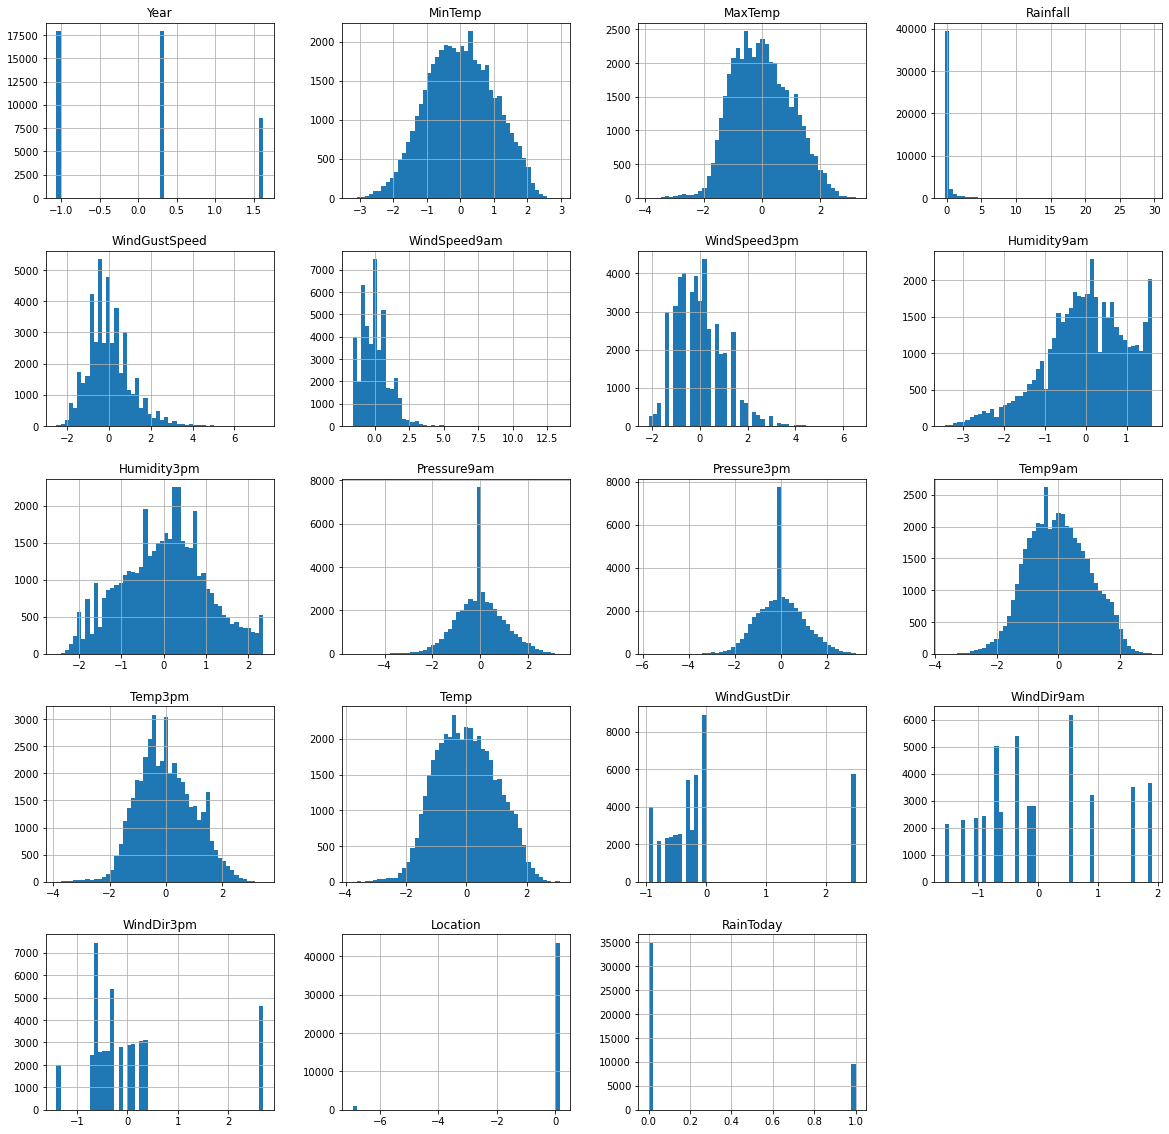

In [31]:
df_x.hist(bins=50, figsize=(20, 20))
plt.show()

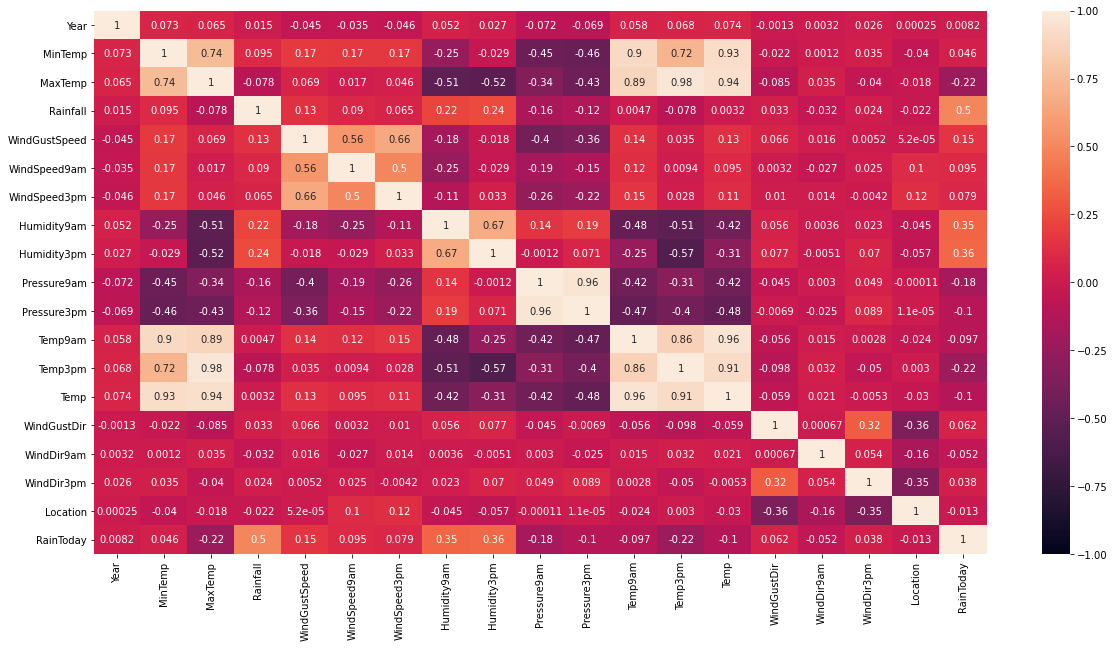

In [32]:
# Let see the correlation

plt.figure(figsize=(20,10))
heatmap = sns.heatmap(df_x.corr(), vmin=-1, vmax=1, annot=True)

In [33]:
# Teamp9am(89%) and Temp3pm(98%) has high correlation with MaxTemp

df_x.drop('Temp9am',axis=1,inplace=True)
df_x.drop('Temp3pm',axis=1,inplace=True)

In [34]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(df_x, df_cat['RainTomorrow'], test_size=0.2, random_state=50)

<AxesSubplot:>

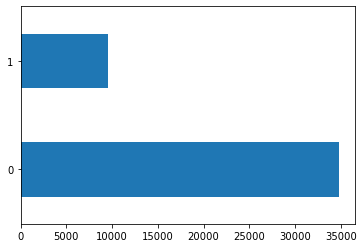

In [35]:
#As we can see we are dealing with big imbalance dataset, We need to perform oversampling

df_cat['RainTomorrow'].value_counts().plot(kind='barh')

In [36]:
# Oversampled

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 37) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
from collections import Counter

print("Before {}".format(Counter(y_train)))
print("After {}".format(Counter(y_train_res)))

Before Counter({0: 27870, 1: 7683})
After Counter({0: 27870, 1: 27870})


In [37]:
# XGBoost

from sklearn import datasets, linear_model, metrics 
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=10,random_state = 37)
model.fit(X_train_res, y_train_res)
model.score(X_train_res, y_train_res)

y_pred = model.predict(X_test)

[23:16:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [38]:
print('Confusion matrix \n {}'.format(confusion_matrix(y_test,y_pred)))
print('Accuracy score {:.2f}'.format(accuracy_score(y_test,y_pred)*100))
print(classification_report(y_test,y_pred))

Confusion matrix 
 [[6525  453]
 [ 915  996]]
Accuracy score 84.61
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6978
           1       0.69      0.52      0.59      1911

    accuracy                           0.85      8889
   macro avg       0.78      0.73      0.75      8889
weighted avg       0.84      0.85      0.84      8889



In [39]:
from fbprophet import Prophet

m = Prophet()

df_for=data[['Date','Rainfall']]
df_for['Date']=pd.to_datetime(df_for['Date'])
df_for.rename(columns = {'Date':'ds'}, inplace = True)
df_for.rename(columns = {'Rainfall':'y'}, inplace = True)
m.fit(df_for)



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
future = m.make_future_dataframe(periods=1285)
future.tail()

,ds
2187,2020-12-27
2188,2020-12-28
2189,2020-12-29
2190,2020-12-30
2191,2020-12-31


In [41]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2187,2020-12-27,2.584239,-140.419543,144.473891
2188,2020-12-28,2.728047,-143.741597,147.087357
2189,2020-12-29,2.533433,-141.967386,142.579200
2190,2020-12-30,2.751104,-143.924309,141.716473
2191,2020-12-31,2.458355,-147.152697,145.055888


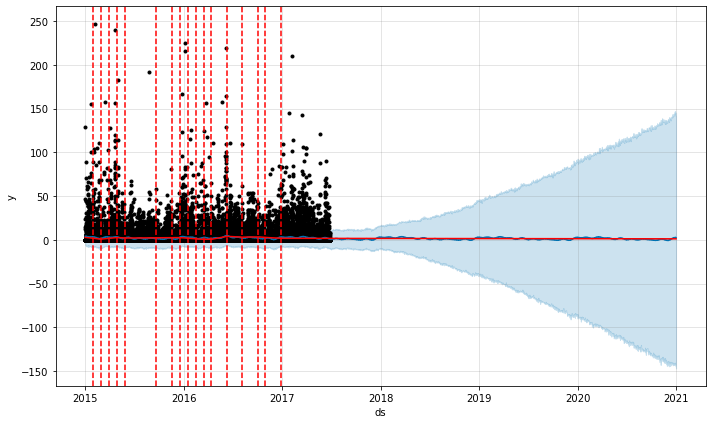

In [42]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
#As per task we used 3 key attributes like rainfall, wind and temperature and predict the calamity
# Through proper descrptive analysis while consider different key factors with 88 prcision of model our model forcast the calamity for next years from 2017 to onward with average accuracy of 88.46% 
# The rainfall in month of december 2020 can cause flood in australia
# you can even check how wonderfully of prediction through this model is accurate that in 2020 dec ... austrila face this calamity as links are given here

https://floodlist.com/australia/nsw-queensland-december-2020
https://www.abc.net.au/news/2020-12-28/decade-on-from-devastating-thedore-flood-entire-town-evacuated/12985622
